In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

# Import Data

In [2]:
df = pd.read_csv("heart_failure_clinical_records.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


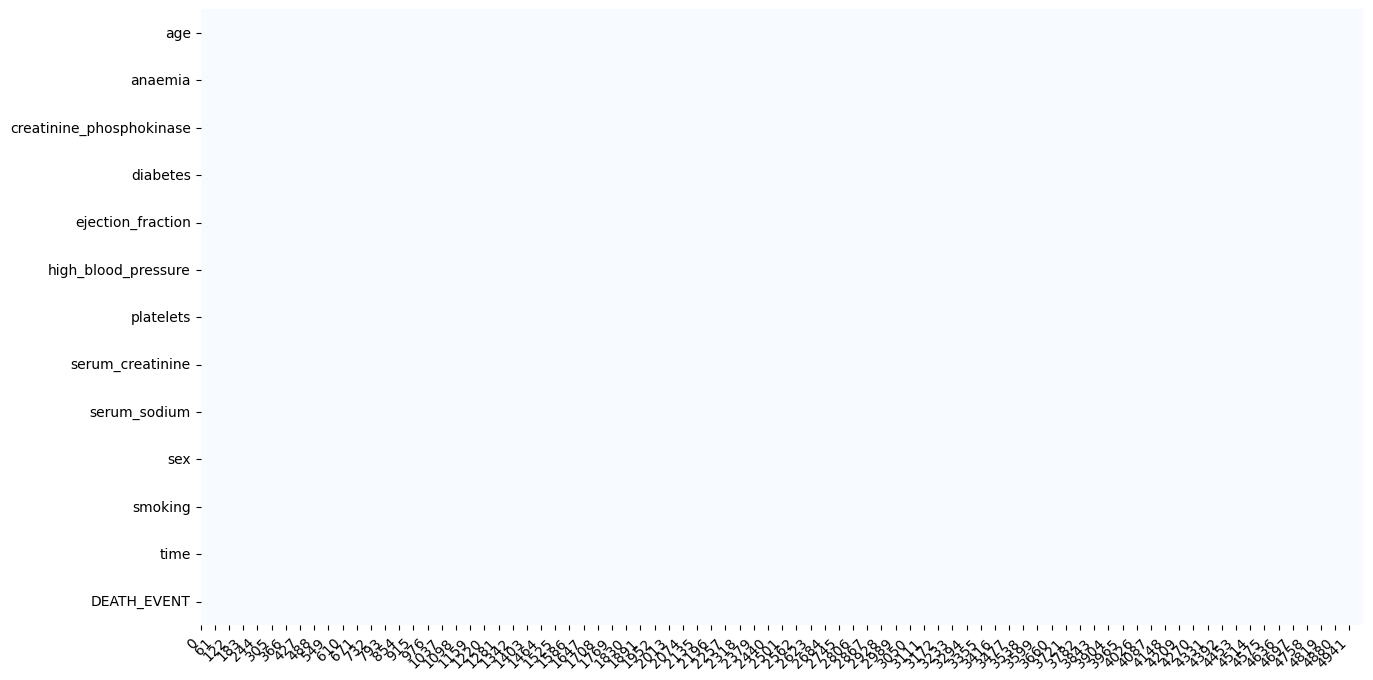

In [3]:
plot_missing_value(df)

# Dataset Splitting

In [4]:
X = df.drop(columns="DEATH_EVENT")
y = df.DEATH_EVENT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 12), (1000, 12), (4000,), (1000,))

# Training

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [6]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium',  'time']),
    ('categoric',cat_pipe(encoder='onehot'),['anaemia','diabetes','high_blood_pressure','sex','smoking'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])




model = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


C:\Users\ASUS\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.1}
0.994 0.9820005601100426 0.979


simple model yang didapat cukup bagus dengan score segitu untuk dijadikan banchmark bisa lebih improve dengan feature enginering atau lainnya karena data ini imbalance kita coba scoring dengan f1

In [7]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium',  'time']),
    ('categoric',cat_pipe(encoder='onehot'),['anaemia','diabetes','high_blood_pressure','sex','smoking'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])




model = GridSearchCV(pipeline, gsp.svm_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


C:\Users\ASUS\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.1}
0.9903923138510808 0.9711553013250441 0.9665071770334929


In [8]:
from jcopml.plot import plot_confusion_matrix

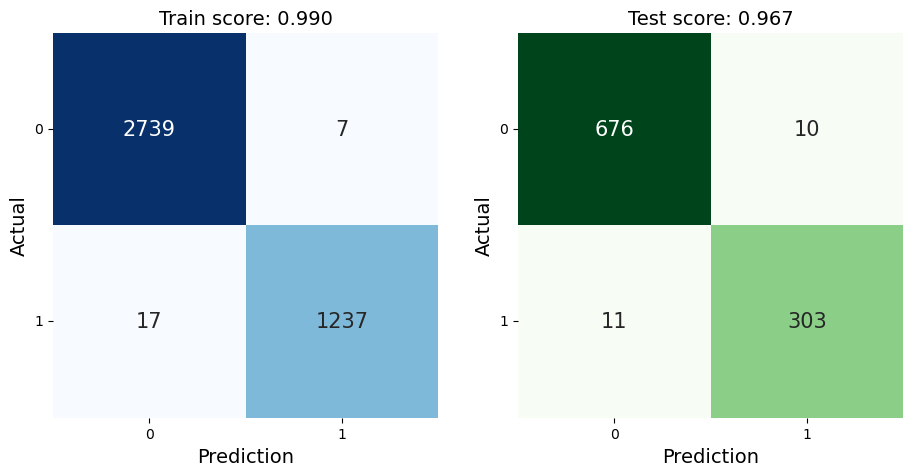

In [9]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

# Coba Improve dengan Class weight

In [10]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium',  'time']),
    ('categoric',cat_pipe(encoder='onehot'),['anaemia','diabetes','high_blood_pressure','sex','smoking'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

parameter = {
    'algo__gamma': np.logspace(-3,3,7),
    'algo__C': np.logspace(-3,3,7),
    'algo__kernel': ['linear', 'rbf'],
    'algo__class_weight': [{0: x, 1:1-x} for x in [0.05,0.1,0.25]]
}

model = GridSearchCV(pipeline, parameter, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 294 candidates, totalling 882 fits


C:\Users\ASUS\miniconda3\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 1000.0, 'algo__class_weight': {0: 0.25, 1: 0.75}, 'algo__gamma': 0.1, 'algo__kernel': 'rbf'}
0.9972122660294703 0.9676692537387162 0.9699842022116905


In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium',  'time']),
    ('categoric',cat_pipe(encoder='onehot'),['anaemia','diabetes','high_blood_pressure','sex','smoking'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

parameter = {
    'algo__gamma': np.logspace(-3,3,7),
    'algo__C': np.logspace(-3,3,7),
    'algo__kernel': ['linear', 'rbf'],
    'algo__class_weight': [None,"balanced"]
}

model = GridSearchCV(pipeline, parameter, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 196 candidates, totalling 588 fits


# Kesimpulan

dengan tuning balanced di class_weight tidak berpengaruh banyak tapi ketika scaled menggunkan robust cuku membaik

In [11]:
for i in df.Diagnosis.value_counts().index:
    print(i)
    

AttributeError: 'DataFrame' object has no attribute 'Diagnosis'

In [ ]:
df.Diagnosis.value_counts()

In [ ]:
df["Diagnosis"].value_counts().index